In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read NDBC met file
fp = 'D:/crs/proj/2019_DUNEX/runup_calcs/m44018_2021.txt'
df = pd.read_csv(fp, skiprows = 2, header=0, names = ['YY','MM','DD','hh','mm','WDIR','WSPD','GST','WVHT','DPD','APD','MWD','PRES','ATMP','WTMP','DEWP','VIS','TIDE'], delim_whitespace=True, parse_dates=[[0,1,2,3,4]], index_col=0)

#units are in the second row drop them
#df.drop(df.index[1], axis=0, inplace=True)

#convert the dates to datetimes
df.index = pd.to_datetime(df.index,format="%Y %m %d %H %M")
df.index.names = ['datetime']
df

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2021-01-01 00:10:00,308,9.1,11.5,99.00,99.00,99.00,999,1022.2,5.6,6.9,-1.9,99.0,99.0
2021-01-01 00:20:00,309,9.7,11.5,99.00,99.00,99.00,999,1022.4,5.5,6.9,-2.3,99.0,99.0
2021-01-01 00:30:00,310,9.6,11.5,99.00,99.00,99.00,999,1022.5,5.5,6.9,-2.5,99.0,99.0
2021-01-01 00:40:00,311,9.5,11.7,1.05,4.76,4.05,299,1022.7,5.5,6.9,-2.3,99.0,99.0
2021-01-01 00:50:00,318,9.5,11.8,99.00,99.00,99.00,999,1023.0,5.4,6.9,-2.5,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 17:00:00,272,2.7,3.3,99.00,99.00,99.00,999,1021.6,5.4,4.1,1.3,99.0,99.0
2021-03-09 17:10:00,281,2.9,3.5,99.00,99.00,99.00,999,1021.4,5.6,4.0,1.1,99.0,99.0
2021-03-09 17:20:00,285,3.0,3.9,99.00,99.00,99.00,999,1021.4,5.6,3.9,1.3,99.0,99.0


In [3]:
df['WVHT'].replace(99.00,np.nan, inplace=True)
df['DPD'].replace(99.00,np.nan, inplace=True)
df['APD'].replace(99.00,np.nan, inplace=True)
df['MWD'].replace(999,np.nan, inplace=True)
df['VIS'].replace(99.0,np.nan, inplace=True)
df['MWD'].replace(99.0,np.nan, inplace=True)



#df = df[df['WVHT'].notna()]
df

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2021-01-01 00:10:00,308,9.1,11.5,NaN,NaN,NaN,NaN,1022.2,5.6,6.9,-1.9,NaN,99.0
2021-01-01 00:20:00,309,9.7,11.5,NaN,NaN,NaN,NaN,1022.4,5.5,6.9,-2.3,NaN,99.0
2021-01-01 00:30:00,310,9.6,11.5,NaN,NaN,NaN,NaN,1022.5,5.5,6.9,-2.5,NaN,99.0
2021-01-01 00:40:00,311,9.5,11.7,1.05,4.76,4.05,299.0,1022.7,5.5,6.9,-2.3,NaN,99.0
2021-01-01 00:50:00,318,9.5,11.8,NaN,NaN,NaN,NaN,1023.0,5.4,6.9,-2.5,NaN,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 17:00:00,272,2.7,3.3,NaN,NaN,NaN,NaN,1021.6,5.4,4.1,1.3,NaN,99.0
2021-03-09 17:10:00,281,2.9,3.5,NaN,NaN,NaN,NaN,1021.4,5.6,4.0,1.1,NaN,99.0
2021-03-09 17:20:00,285,3.0,3.9,NaN,NaN,NaN,NaN,1021.4,5.6,3.9,1.3,NaN,99.0


In [4]:
# read NDBC wave spectra file
fps = 'D:/crs/proj/2019_DUNEX/runup_calcs/s44018_2021.txt'
dfs = pd.read_csv(fps, delim_whitespace=True, parse_dates=[[0,1,2,3,4]], index_col=0)

#convert the dates to datetimes
dfs.index = pd.to_datetime(dfs.index,format="%Y %m %d %H %M")
dfs.index.names = ['datetime']
dfs

,.0200,.0325,.0375,.0425,.0475,.0525,.0575,.0625,.0675,.0725,...,.3300,.3400,.3500,.3650,.3850,.4050,.4250,.4450,.4650,.4850
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.14,0.11,0.06,0.10,0.04,0.05,0.03,0.01,0.01,0.01
2021-01-01 01:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.05,0.12,0.09,0.04,0.04,0.04,0.04,0.01,0.01,0.01
2021-01-01 02:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.01,...,0.13,0.07,0.06,0.07,0.06,0.03,0.02,0.01,0.02,0.01
2021-01-01 03:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.02,...,0.13,0.08,0.06,0.05,0.05,0.05,0.02,0.01,0.01,0.01
2021-01-01 04:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.00,...,0.12,0.08,0.12,0.05,0.05,0.04,0.02,0.03,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 12:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.13,0.08,0.09,0.03,0.05,0.03,0.02,0.02,0.02,0.01
2021-03-09 13:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.10,0.08,0.05,0.06,0.04,0.03,0.04,0.02,0.01,0.01
2021-03-09 14:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.09,0.09,0.06,0.04,0.04,0.05,0.03,0.03,0.01,0.01


In [5]:
# the headers represent the central frequencies
f = np.array(dfs.columns.values).astype(float) # Hz
print(f)

# frequency bin width varies. See https://www.ndbc.noaa.gov/wavespectra.shtml
delf = np.diff(f) # Hz
delf[0] = 0.01
delf[delf==0.0075] = 0.005
delf = np.append(delf,0.02)

[0.02   0.0325 0.0375 0.0425 0.0475 0.0525 0.0575 0.0625 0.0675 0.0725
 0.0775 0.0825 0.0875 0.0925 0.1    0.11   0.12   0.13   0.14   0.15
 0.16   0.17   0.18   0.19   0.2    0.21   0.22   0.23   0.24   0.25
 0.26   0.27   0.28   0.29   0.3    0.31   0.32   0.33   0.34   0.35
 0.365  0.385  0.405  0.425  0.445  0.465  0.485 ]


In [6]:
spec = dfs.values
spec.shape

(1467, 47)

(1467, 46) (46,)
(1467,)


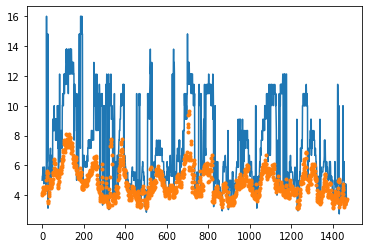

In [7]:
# calculate significant wave height, skipping first bin
# https://www.ndbc.noaa.gov/wavecalc.shtml
print(np.shape(spec[:,1:]), delf[1:].shape )
m0 = np.sum( spec[:,1:] * delf[1:], axis=1 )
m2 = np.sum( spec[:,1:] * delf[1:] * f[1:]**2, axis=1 )
print(m2.shape)
Hs = 4 * np.sqrt(m0)
fp = f[ np.argmax( spec[:,1:], axis = 1)]
Tp = 1. / fp
Tav = np.sqrt( m0 / m2 )
plt.plot(Tp)
plt.plot(Tav,'.')

In [8]:
def runup_lange_eq9( Bf, xmid, E, f, df):
    """
    Two-slope integrated power approximation (IPA) runup equation
    
    Eq. 9 in Lange et al., 2022, Coastal Engineering 172(2022):104055.
    
    E = 1/8 * rhow * g * H**2 / L
    
    Input:
        Bf - Beach slope (float scalar; m/s)
        xmid - Location where half of wave energy has dissipated (float scalar; m)
        E  - Wave energy spectra (float array) 
        f  - Frequencies  (float array; same shape as wave energy) (1/s)
        df - Frequency (float scalar if delta f is uniform; float array same shape as wave array if variable; 1/s)
        
    Returns
        R2 - Runup (2% exceedence) [m]
    """
    H0 = 4. * (np.sum( E * df ))**0.5
    C = 0.94                                     # coefficient from page 8
    Beff = C * H0 / xmid                         # eqn. 8
    # eqn. 9
    term1 = 0.4  * Beff**.45 * np.sum(E**0.5 * f**(-1.45) * df)
    term2 = 3.72 * Beff**0.6 * np.sum(E**0.95 * f**(-0.25) * df)
    term3 = 0.76 * Bf**2 * Beff**0.75 * np.sum(E**0.4 * f**(-3.1) * df)
    R2 = term1 + 2. * ( term2 + term3 )**0.5
    return R2, H0, Beff
    